# Polynomial Regression

In [24]:
# We would need these libraries to manage our dataset
# Numpy: used for large, multi-dimensional arrays and matrices, and for high-level mathematical functions
# Pandas: used for data manipulation and analysis
# matplotlib: used for visualisation and plotting graph/image/etc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
# Import the iris dataset from sklearn
# https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets
from sklearn.datasets import load_iris
# load the dataset
iris = load_iris()
print(iris['feature_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [54]:
# reshape the X so it is a 2D array, which sklearn model usually expect
X = iris['data'][:,0].reshape(-1, 1) # 'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
y = iris['data'][:,3] # petal width (cm)
X.shape

(150, 1)

In [55]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [56]:
poly = PolynomialFeatures(degree=2)
X_ = poly.fit_transform(X)
X_.shape

(150, 3)

In [57]:
X[0], X_[0]

(array([5.1]), array([ 1.  ,  5.1 , 26.01]))

In [58]:
# import regression from sklearn
from sklearn.linear_model import LinearRegression
# fit/train the model using the data
reg = LinearRegression()
reg.fit(X_, y)

LinearRegression()

In [59]:
SUB = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉") # used to create subscript so it's pretty
print('score (r square):', reg.score(X_, y))
print('coef:', reg.coef_)
print('intercept:', reg.intercept_)

score (r square): 0.700599606382408
coef: [ 0.          2.80601494 -0.17189424]
intercept: -9.210815856143169


In [73]:
plt_x = np.linspace(X[:,0].min(), X[:,0].max(), 500).reshape(-1,1)
plt_x_squared= poly.fit_transform(plt_x)
y_pred = reg.predict(plt_x_squared)

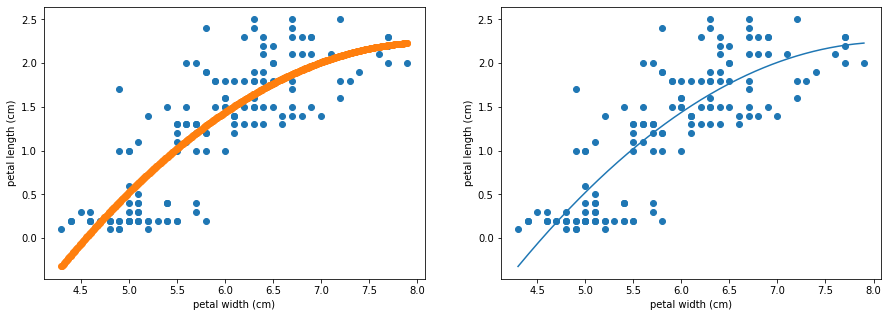

In [79]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
for i in range(2):
    axs[i].scatter(X, y)
    axs[i].set_xlabel(iris['feature_names'][3])
    axs[i].set_ylabel(iris['feature_names'][2])
axs[0].scatter(plt_x, y_pred)
axs[1].plot(plt_x, y_pred)
